## 5.モンテカルロ法

４章では、動的計画法（DP）を使って、最適価値関数と最適方策を得たが、この手法は<br>
**「環境のモデル（状態価値確率と報酬関数）」が既知**である必要がある。

環境が未知でより良い方策を見つける<br>
→エージェントが実際に行動を起こし、その経験から学ぶ<br>
→「状態、行動、報酬」のデータから学ぶ


### サイコロの目の和

![](./picture/pict1.png)

![](./picture/pict2.png)

確率分布から期待値を求めることができて、期待値は７

この期待値をサンプリングから求めたい→モンテカルロ法

In [2]:
import numpy as np

def sample(dices=2):
    x = 0
    for _ in range(dices):
        x += np.random.choice([1, 2, 3, 4, 5, 6])
    return x

In [3]:
print(sample())
print(sample())
print(sample())

3
7
6


「数を売って、平均を取る」かんたんな方法だが、サンプル数を無限大にしたとき、大数の法則より、平均値は期待値に収束する

### モンテカルロ法の実装

In [5]:
trial = 100000

samples = []
for _ in range(trial):
    s = sample()
    samples.append(s)

V = sum(samples) / len(samples)
print(V)

7.00069


データを得るたびに平均値を求めたいときな「インクリメンタル」な実装が良い

![](./picture/pict3.png)


In [6]:
trial = 1000
V, n = 0, 0

for _ in range(trial):
    s = sample()
    n += 1
    V += (s - V) / n
    print(V)

5.0
7.5
6.333333333333333
6.75
7.8
7.5
7.142857142857143
7.125
7.111111111111111
6.699999999999999
6.545454545454545
6.25
6.3076923076923075
6.357142857142857
6.3999999999999995
6.562499999999999
6.529411764705881
6.3888888888888875
6.368421052631578
6.349999999999999
6.333333333333332
6.409090909090908
6.478260869565217
6.583333333333333
6.8
6.769230769230769
6.851851851851852
6.821428571428572
6.793103448275863
6.900000000000001
6.838709677419356
6.812500000000001
6.818181818181819
6.794117647058824
6.6571428571428575
6.611111111111112
6.567567567567568
6.552631578947369
6.666666666666667
6.775
6.658536585365854
6.690476190476191
6.627906976744186
6.636363636363637
6.711111111111111
6.782608695652174
6.829787234042553
6.791666666666666
6.775510204081632
6.76
6.784313725490196
6.75
6.735849056603773
6.703703703703703
6.709090909090909
6.75
6.7368421052631575
6.758620689655172
6.694915254237287
6.716666666666666
6.754098360655737
6.758064516129032
6.746031746031746
6.71875
6.7692307692

### モンテカルロ法による方策評価

エージェントが実際に行動して得た経験（サンプルデータ）から価値関数を推定する
ここでは、方策πが得られたときに、その方策の価値関数をモンテカルロ法を使って計算する。

価値関数は以下の式だった。

$$v_\pi(s) = \mathbb{E}_\pi [G | s]$$

方策πに従ってエージェントに実際に行動させます。<br>
そうして得られた実際の収益がサンプルデータになります。<br>
これの平均は、

$$V_\pi(s) = \frac{G^{(1)} + G^{(2)} + \cdots + G^{(n)}}{n}$$

（モンテカルロ法はエピソードタスク、終わりがあるタスクにのみ適用できる）



ひとつの状態については、上の式によって、価値関数をモンテカルロ法で求めた。
次は全ての状態の価値関数を求めてみる。

![](./picture/pict5.png)

上の方法では、各状態の価値関数を独立にもとめている点が問題。
また、任意の状態からスタートできる問題には適用できるが、任意の状態からスタートできる問題は少ない。

もっと効率がいい方法はないか

まずは、次の例を考えてみる

![](./picture/pict6.png)

状態Aからスタートして得られる報酬は次の式

$$G_{A}=R_{0}+\gamma R_{1}+\gamma^2 R_{2}$$

Bから下の遷移について注目してみる

![](./picture/pict7.png)

このように考えると、Bからスタートした場合の収益のサンプルデータとみなせる。
このとき、収益は、

$$G_{B}=R_{1}+ \gamma R_{2}$$

同様にCも考えることができ、

$$G_{C}=R_{2}$$

このように、一つの試行だけから、３つの状態に対しての収益（サンプルデータ）が得られたことになります。



### モンテカルロ法の効率の良い実装

上の例では、収益は以下のようになった。

$$G_{C}=R_{2}$$
$$G_{B}=R_{1}+\gamma G_{C}$$
$$G_{A}=R_{0}+\gamma G_{B}$$

このように上から順に（後ろから順に）収益を求めれば、重複した計算を省ける

### モンテカルロ法の実装

４章で解いた「３×４のグリットワールド」の問題を、モンテカルロ法で解いてみる

![](./picture/pict8.png)

今回は、環境のモデル（状態遷移確率、と報酬関数）を使わずに方策評価を行います。
そのために、エージェントに実際に行動を行わせるためのメソッドが必要

In [5]:
from collections import defaultdict
import numpy as np
from dezerogym.gridworld import GridWorld

env = GridWorld()
action = 0
next_state, reward, done = env.step(action)

print('next_state:',next_state)
print('reward:',reward)
print('done:',done)

next_state: (1, 0)
reward: 0
done: False


![](./picture/pict9.png)

In [6]:
### エージェントクラスの実装

class RandomAgent:
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.V = defaultdict(lambda: 0)
        self.cnts = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs) # 確率的に行動を選択
    
    def add(self, state, action, reward):
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        self.memory.clear()

    def eval(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = self.gamma * G + reward
            self.cnts[state] += 1
            self.V[state] += (G - self.V[state]) / self.cnts[state]

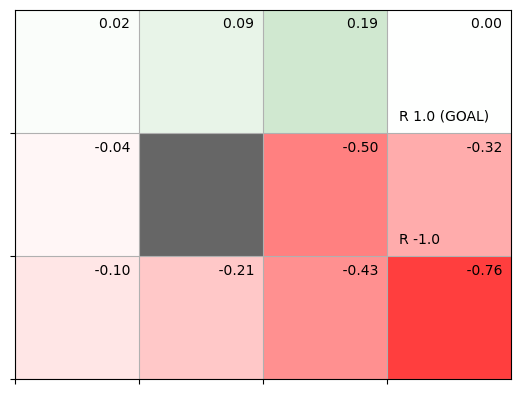

In [7]:
env = GridWorld()
agent = RandomAgent()

episodes = 1000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.add(state, action, reward)
        if done:
            agent.eval()
            break

        state = next_state

env.render_v(agent.V)

### モンテカルロ法による方策制御

最適方策は、「評価」と「改善」を交互に繰り返すことによって、得られます。

「評価」のフェーズでは、方策を評価して価値関数を得ます。そして、「改善」フェーズでは、価値関数をgreedy化することで、方策を改善します。

この２つのプロセスを交互に繰り返すことで、最適方策へと徐々に近づいていきます。

![](./picture/pict10.png)

（５．４）式で計算するのは無理、（環境のモデルが決まっているから）なので、（５．３）のQ関数の方を使って方策の改善を行う。

Q関数を対象に改善する場合、Q関数に関して、「評価」を行わなければいけません。モンテカルロ法の更新式をQに切り替える。

![](./picture/pict11.png)

In [ ]:
def greedy_probs(Q, state, action_size=4):
    qs = [Q[(state, action)] for action in range(action_size)]
    max_action = np.argmax(qs)

    action_probs = {action: 0.0 for action in range(action_size)} 
    action_probs[max_action] += 1 # 修正点１
    return action_probs

class McAgent:
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
        self.cnts = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        self.memory.clear()

    def update(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = self.gamma * G + reward
            key = (state, action)
            self.Q[key] += (G - self.Q[key]) /self.cnts[key] # 修正点２
            self.pi[state] = greedy_probs(self.Q, state, self.epsilon) # type: ignore


### $\epsilon$ - greedy化（１つ目の修正）

エージェントは改善フェーズで方策をgreedy化します。これにより、ある状態で行う行動は１つに固定されます。例えば、greedy化して次のようになったとします。

![](./picture/pict12.png)

これでは、全ての状態と行動の組み合わせに対して、収益のサンプルデータを集められない

→エージェントの「探索」を行わせる

In [14]:
def greedy_probs(Q, state, epsilon=0, action_size=4):
    qs = [Q[(state, action)] for action in range(action_size)]
    max_action = np.argmax(qs)

    base_prob = epsilon / action_size
    action_probs = {action: base_prob for action in range(action_size)}  #{0: ε/4, 1: ε/4, 2: ε/4, 3: ε/4}
    action_probs[max_action] += (1 - epsilon)
    return action_probs


![](./picture/pict13.png)

ここでは、これまで完全にgreedyにしていた確率分布をε-greedyに変更します。全ての行動を4/εにして、Q関数が最大の行動に１−εの確率を追加します。

### 固定値α方式へ(２つ目の修正)

In [15]:
# self.Q[key] += (G - self.Q[key]) /self.cnts[key]

#alpha = 0.1
#self.Q[key] += (G - self.Q[key]) * self.alpha

![](./picture/pict14.png)

In [16]:
class McAgent:
    def __init__(self):
        self.gamma = 0.9
        self.epsilon = 0.1
        self.alpha = 0.1
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        self.memory.clear()

    def update(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = self.gamma * G + reward
            key = (state, action)
            self.Q[key] += (G - self.Q[key]) * self.alpha
            self.pi[state] = greedy_probs(self.Q, state, self.epsilon)


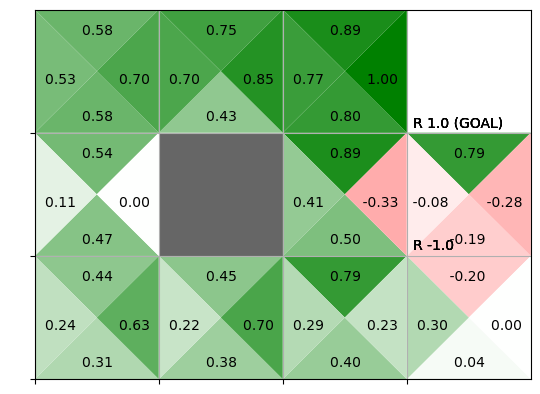

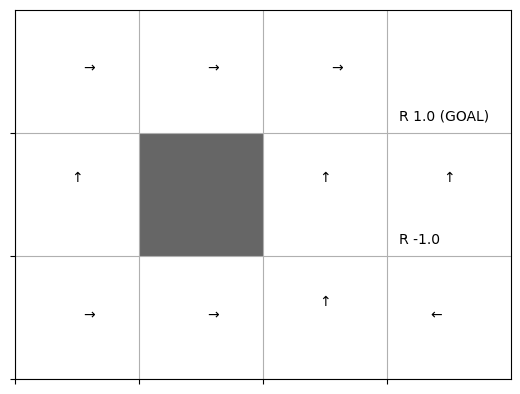

In [17]:
env = GridWorld()
agent = McAgent()

episodes = 10000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.add(state, action, reward)
        if done:
            agent.update()
            break

        state = next_state

env.render_q(agent.Q)